In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)

In [22]:
from sklearn.model_selection import train_test_split

In [5]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [7]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


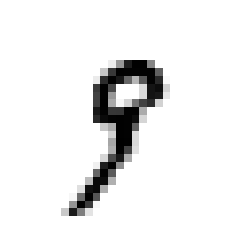

In [21]:
plt.imshow(X[19].reshape(28,28), cmap='binary')
plt.axis("off")
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, shuffle=True, random_state = 24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63000, 784)
(7000, 784)
(63000,)
(7000,)
